<a href="https://colab.research.google.com/github/nvwa0318/Supervise-learning/blob/main/mushroom_classification%20competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import data
url = "https://drive.google.com/file/d/1ZdMrZc0JcjWU8LQHWdHQstzdfz_Mtb86/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

Data_tr = pd.read_csv(path)
Data_tr

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [ ]:
Data_tr

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [ ]:
#import data
#url = "https://drive.google.com/file/d/1ZdMrZc0JcjWU8LQHWdHQstzdfz_Mtb86/view?usp=sharing"
##path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

#y1tr = pd.read_csv(path)
#ytr1=y1tr['poisonous']
#ytr1
ytr1=Data_tr['poisonous']
ytr1

0       1
1       0
2       0
3       0
4       0
       ..
6494    1
6495    1
6496    1
6497    0
6498    1
Name: poisonous, Length: 6499, dtype: int64

In [ ]:
#import data
url = "https://drive.google.com/file/d/12BXUi6nuUX40ad9uShOR0fSza2sp8kt9/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

Data_te = pd.read_csv(path)
Data_te

,Id,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,bruises,population
0,5165,f,w,w,w,True,v
1,4281,f,g,n,p,False,v
2,231,x,n,w,p,True,v
3,3890,f,n,w,w,False,s
4,1521,x,y,n,p,False,v
...,...,...,...,...,...,...,...
1620,983,x,n,w,y,False,v
1621,7055,x,e,p,g,True,v
1622,7456,x,y,b,n,False,y
1623,5132,x,w,w,w,True,n


In [ ]:
Data_te.isnull().sum()

Id                        0
cap.shape                 0
cap.color                 0
stalk.color.above.ring    0
stalk.color.below.ring    0
bruises                   0
population                0
dtype: int64

In [ ]:
def label_encode_columns(df, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

In [ ]:
encode_columns = list(Data_tr.select_dtypes(['object']).columns)
dtr, encoders = label_encode_columns(df=Data_tr, columns=encode_columns)


print('Updates dataframe is : \n' ,dtr )
 
col=list(dtr.columns)

Updates dataframe is : 
       cap.shape  cap.color  bruises  stalk.color.above.ring  \
0             3          2    False                       7   
1             2          2     True                       6   
2             0          8    False                       7   
3             3          3    False                       7   
4             2          4     True                       6   
...         ...        ...      ...                     ...   
6494          2          3    False                       0   
6495          3          2    False                       6   
6496          2          3    False                       4   
6497          2          4     True                       7   
6498          2          2    False                       6   

      stalk.color.below.ring  population    Id  poisonous  
0                          7           4  6573          1  
1                          7           5  4426          0  
2                          7          

In [ ]:
dtr.describe()

,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
count,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,3.356209,4.486536,5.813818,5.775812,3.651023,4056.304508,0.485767
std,1.599399,2.542152,1.898661,1.919845,1.250578,2343.607342,0.499836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,6.000000,6.000000,3.000000,2022.500000,0.000000
50%,3.000000,4.000000,7.000000,7.000000,4.000000,4058.000000,0.000000
75%,5.000000,8.000000,7.000000,7.000000,4.000000,6083.500000,1.000000
max,5.000000,9.000000,8.000000,8.000000,5.000000,8122.000000,1.000000


In [72]:
dtr1=dtr

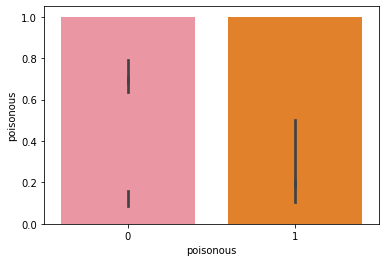

In [ ]:
import seaborn as sns

for i in dtr.columns:
 sns.barplot(x = i,
            y = ytr1,
            #hue = 'class',
            data = dtr)


In [69]:
dtr1

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id
0,3,2,False,7,7,4,6573
1,2,2,True,6,7,5,4426
2,0,8,False,7,7,3,7018
3,3,3,False,7,7,2,5789
4,2,4,True,6,3,4,6187
...,...,...,...,...,...,...,...
6494,2,3,False,0,0,4,7002
6495,3,2,False,6,6,4,7323
6496,2,3,False,4,0,5,6206
6497,2,4,True,7,7,3,4658


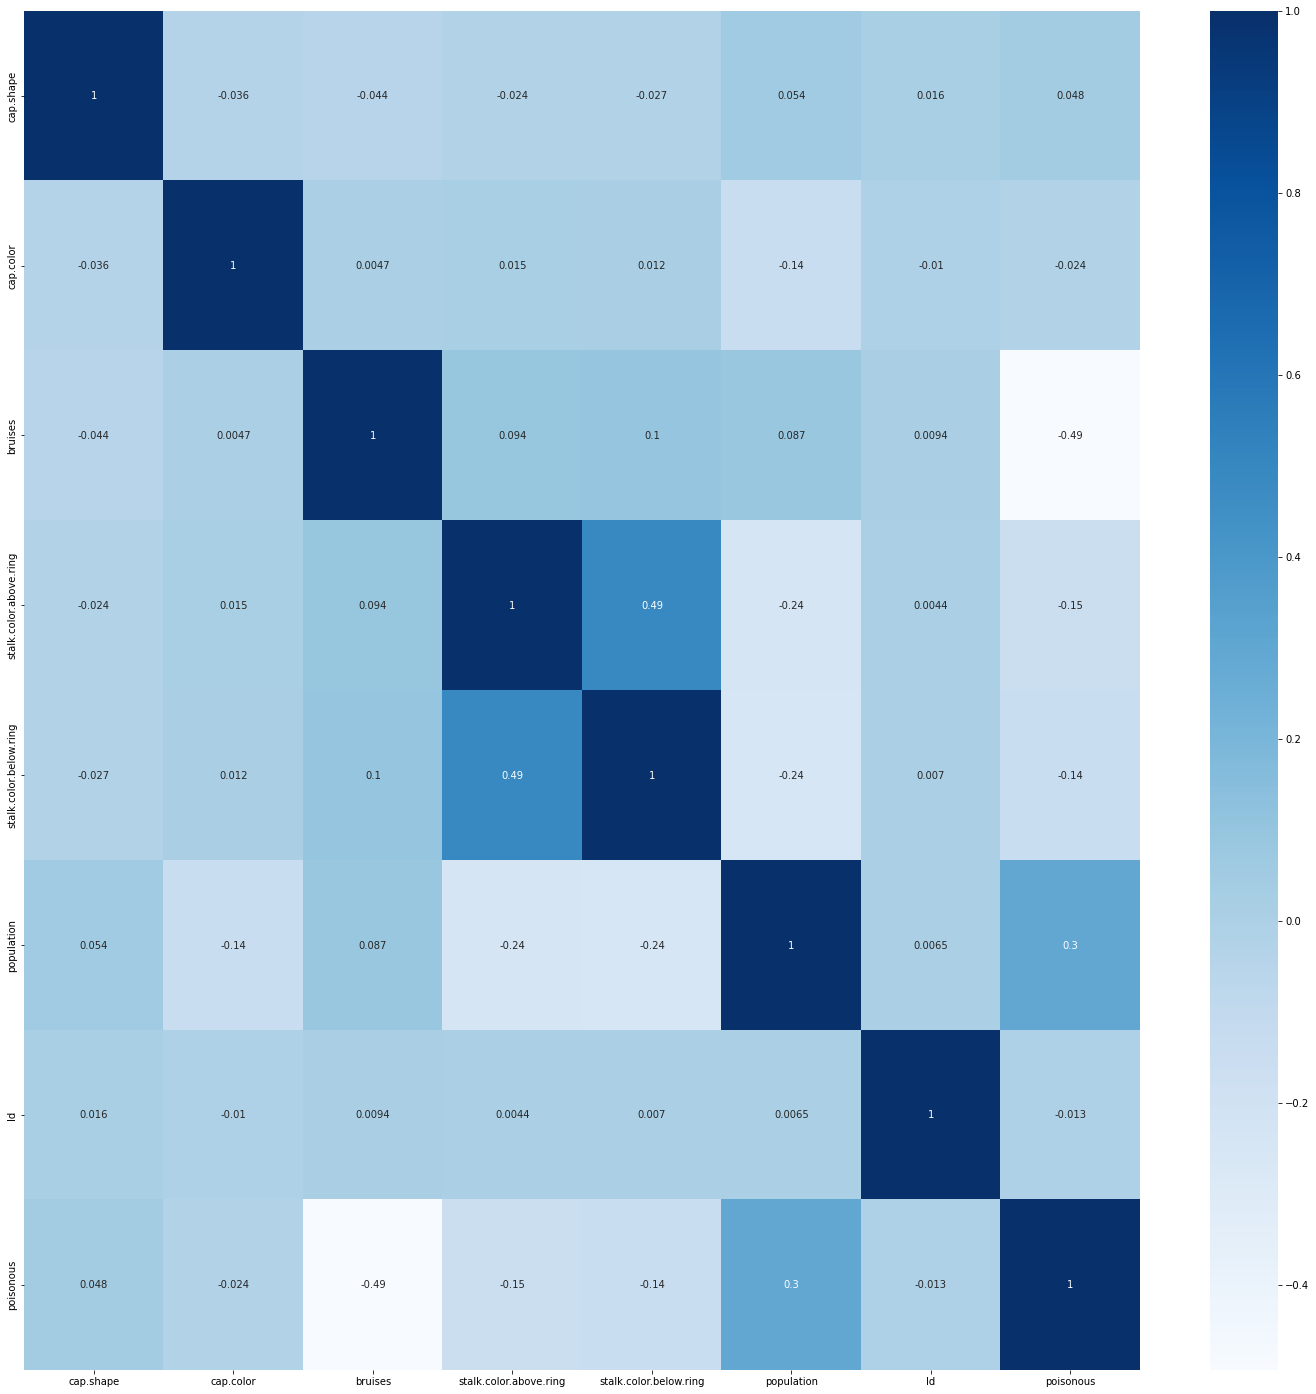

In [ ]:
fig,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dtr.corr(), annot = True,cmap= 'Blues')#, fmt='.6g'

In [73]:
dtr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   cap.shape               6499 non-null   int64
 1   cap.color               6499 non-null   int64
 2   bruises                 6499 non-null   bool 
 3   stalk.color.above.ring  6499 non-null   int64
 4   stalk.color.below.ring  6499 non-null   int64
 5   population              6499 non-null   int64
 6   Id                      6499 non-null   int64
 7   poisonous               6499 non-null   int64
dtypes: bool(1), int64(7)
memory usage: 361.9 KB


In [74]:
print('Data Shape = ',dtr1.shape)
encode_columns = list(dtr1.columns)
dtr_coorr=[]
Drop_col=[]
for i in encode_columns:
    if((dtr1[i].corr(dtr1['poisonous']) <= 0.07) and (dtr1[i].corr(dtr1['poisonous'])>= -0.07)):
        #New_Data.drop(i, axis=1, inplace=True)
        Drop_col.append(i)
        print(i)
    elif((dtr1[i].corr(dtr1['poisonous']) >= 0.1) or (dtr1[i].corr(dtr1['poisonous'])<= -0.1)):
         dtr_coorr.append([dtr1['poisonous'].corr(dtr1[i]),i])

Data Shape =  (6499, 8)
cap.shape
cap.color
Id


In [75]:
dtr_coorr= np.reshape(dtr_coorr,(len(dtr_coorr),len(dtr_coorr[0])))
dtr_coorr = pd.DataFrame(dtr_coorr)
dtr_coorr=dtr_coorr.set_index(dtr_coorr[0])
dtr_coorr=dtr_coorr.iloc[:, 1]

dtr_coorr=dtr_coorr.sort_index(ascending=False)

In [ ]:
print(dtr_coorr)

0
1.0                                  poisonous
0.29561308310622364                 population
-0.4936207920863598                    bruises
-0.15295350193835358    stalk.color.above.ring
-0.14196671004268227    stalk.color.below.ring
Name: 1, dtype: object


In [76]:
dtr_corr=dtr_coorr[:8]
for i in  dtr_corr:
    if i =='poisonous'  or i=='bruises':
        continue
    Q1=dtr1[i].quantile(0.25)
    Q3=dtr1[i].quantile(0.75)    
    IQR = Q3 - Q1
    lowqe_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    print(lowqe_bound)
    price_df=dtr1[i]
    dtr1[i] = dtr1[i][~((dtr1[i] < lowqe_bound) |(dtr1[i] > upper_bound))]
    print('********')

1.5
********
4.5
********
4.5
********


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
#col=dtr.columns
#imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
#imp = imp.fit(dtr)
#dtr = imp.transform(dtr)
#dtr= np.reshape(dtr,(len(dtr),len(dtr[0])))
#dtr = pd.DataFrame(dtr,columns=col)

In [ ]:
ytr1

0       1
1       0
2       0
3       0
4       0
       ..
6494    1
6495    1
6496    1
6497    0
6498    1
Name: poisonous, Length: 6499, dtype: int64

In [ ]:
#dtr1.append(Data_tr['poisonous'])

In [77]:
dtr1.fillna(dtr1.mean(),inplace=True)

In [78]:
#print('Data Shape = ',dtr1.shape)
encode_columns = list(dtr1.columns)
dtr_coorr=[]
Drop_col=[]
for i in encode_columns:
    if((dtr1[i].corr(dtr1['poisonous']) <= 0.07) and (dtr1[i].corr(dtr1['poisonous'])>= -0.07)):
        #New_Data.drop(i, axis=1, inplace=True)
        Drop_col.append(i)
        print(i)
    elif((dtr1[i].corr(dtr1['poisonous']) >= 0.1) or (dtr1[i].corr(dtr1['poisonous'])<= -0.1)):
         dtr_coorr.append([dtr1['poisonous'].corr(dtr1[i]),i])

cap.shape
cap.color
Id


In [ ]:
dtr = pd.DataFrame(dtr,columns=dtr.columns)

In [ ]:
Drop_col

['cap.shape', 'cap.color']

In [79]:
#Drop_col
#D=dtr
#x=D.loc[:,Drop_col]
x=dtr1

model = PCA(n_components= 2, svd_solver='full')#it can be full,arpack,randomized
model.fit(x)

data = model.transform(x)
data = pd.DataFrame(data)

#New_Data = pd.concat([New_Data, data], axis=1)
dtr1.drop(Drop_col, axis=1, inplace=True)

In [80]:
dtr1.isnull().sum()

bruises                   0
stalk.color.above.ring    0
stalk.color.below.ring    0
population                0
poisonous                 0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split


In [81]:
X_train,X_test, y_train, y_test = train_test_split(dtr1, ytr1, test_size=0.15, random_state=137)

In [82]:
VD=dtr1.iloc[:,1]
VD=(VD-VD.min())/(VD.std())

In [98]:
#DTR = DecisionTreeRegressor(random_state=True)
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(
    max_depth=3,
                                 min_samples_split=2,
                                 criterion="gini",
                                 random_state=2
)   #random_state=True
DTR.fit(X_train,y_train)
print('DecisionTreeClassifier')
print('score = ',DTR.score(X_train,y_train))
VD_predict2=DTR.predict(X_test)
#MSEValue = mean_squared_error(VD, VD_predict2, multioutput='uniform_average')
#print('Mean_squared_error = ',MSEValue)

DecisionTreeClassifier
score =  1.0


In [99]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 11, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }
    
from sklearn.model_selection import RandomizedSearchCV
 
search = RandomizedSearchCV(DTR, # you have defined this beforehand
                      param_grid, # your parameter grid
                      n_iter=10,
                      #cv=9, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      n_jobs=-1,
                      cv=9, # the value for K in K-fold Cross Validation
                      random_state=5) # we want informative outputs during the training process
#search.fit(X_train, y_train)                      

In [101]:
DTR.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [102]:
from sklearn.metrics import classification_report

classification_report(y_test, VD_predict2,labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       511\n           1       1.00      1.00      1.00       464\n\n    accuracy                           1.00       975\n   macro avg       1.00      1.00      1.00       975\nweighted avg       1.00      1.00      1.00       975\n'

In [103]:
print(classification_report(y_test, VD_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       464

    accuracy                           1.00       975
   macro avg       1.00      1.00      1.00       975
weighted avg       1.00      1.00      1.00       975

